In [4]:
import cv2 as cv
import time
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

# Custom helpers
import modules.cv_helpers as ch
import modules.plantnet_helpers as ph
from sklearn.cluster import DBSCAN

# Read in image
image = cv.imread("./img/test2.jpg")

# TODO
# video camera trigger

# Get green areas and remove noise
green_areas = ch.get_green(image)

img_denoised = cv.fastNlMeansDenoisingColored(
    green_areas, None, h=70, templateWindowSize=7, searchWindowSize=21
)
# Convert to binary image to apply clustering algorithm
bnw_image = ch.green_to_bnw(img_denoised)
white_points = ch.binary_to_cartesian(bnw_image)

added


added


added
New: 0.1788485050201416


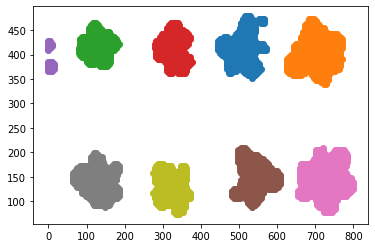

In [28]:
start = time.time()
total_pixels = 20000

frac_x = bnw_image.shape[0]/bnw_image.shape[1]
new_x = round(sqrt(total_pixels/frac_x))
new_y = round(new_x * frac_x)
old_new_img_ratio = bnw_image.shape[0]/new_y

resized_img = cv.resize(bnw_image, (new_x, new_y))
white_points_resized = ch.binary_to_cartesian(resized_img)

dbscan_model = DBSCAN(eps=10, min_samples=10, n_jobs=-1)
dbscan_model.fit(white_points_resized)
dbscan_result = dbscan_model.fit_predict(white_points_resized)
print("New: " + str(time.time() - start))


# get all of the unique clusters
white_points_final = white_points_resized * old_new_img_ratio
dbscan_clusters = np.unique(dbscan_result)

# plot the DBSCAN clusters
for dbscan_cluster in dbscan_clusters:
    # get data points that fall in this cluster
    index = np.where(dbscan_result == dbscan_cluster)
    # make the plot
    plt.scatter(white_points_final[index, 0], white_points_final[index, 1])

# show the DBSCAN plot
plt.show()